## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the number of mice.
len(combined['Mouse ID'])

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
uni_mouse = combined.loc[combined.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
uni_mouse_df = combined[combined['Mouse ID'].isin(uni_mouse)==False]

In [5]:
# Checking the number of mice in the clean DataFrame.
len(uni_mouse_df['Mouse ID'])

1880

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = uni_mouse_df
regimen_df = regimen_df.groupby(['Drug Regimen'])
r_mean = regimen_df.mean()['Tumor Volume (mm3)']
r_median = regimen_df.median()['Tumor Volume (mm3)']
r_var = regimen_df.var()['Tumor Volume (mm3)']
r_sem = regimen_df.sem()['Tumor Volume (mm3)']
reg_sum = pd.DataFrame({"Mean Tumor Volume (mm3)": r_mean,
                      "Median Tumor Volume (mm3)": r_median,
                      "Variance Tumor Volume (mm3)": r_var,
                      "SEM Tumor Volume (mm3)": r_sem})
# This method is the most straighforward, creating multiple series and putting them all together at the end.
reg_sum


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar and Pie Charts

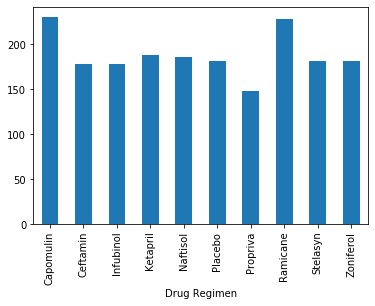

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_mouse_count = uni_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_mouse_count.plot.bar()

Text(0, 0.5, '# of Mice')

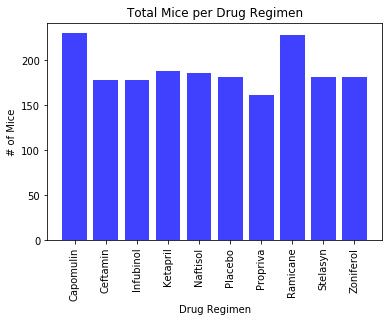

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(regimen_mouse_count))

plt.bar(x_axis, mouse_count, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

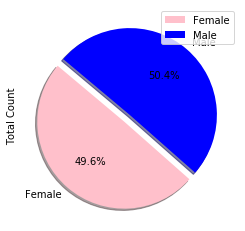

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = uni_mouse_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender_group.size())
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]


colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

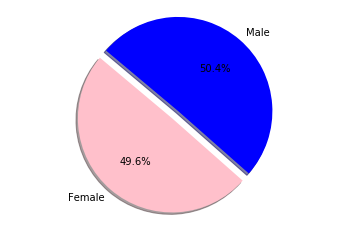

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.596774,50.403226]

colors = ['Pink', 'Blue']

explode = (0.1, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_regimes = uni_mouse_df[uni_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)
top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Start by getting the last (greatest) timepoint for each mouse
last_top_regimes = top_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_regimen_df = last_top_regimes.to_frame()



In [13]:
# Put treatments into a list for for loop (and later for plot labels)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_df = top_regimen_df
tumor_lists = tumorvol_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]  

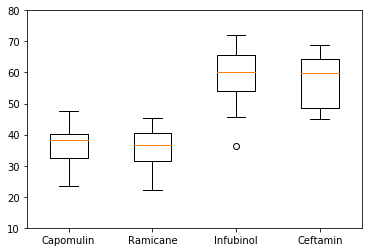

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

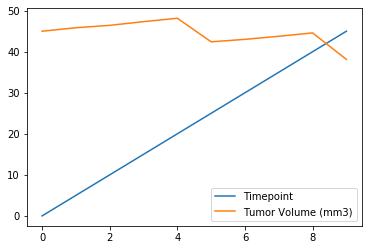

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_v_tumor = uni_mouse_df[uni_mouse_df["Mouse ID"].isin(["j119"])]

time_v_tumor_data = time_v_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

line_plot_df = time_v_tumor_data.reset_index()

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

lines = line_plot_final.plot.line()

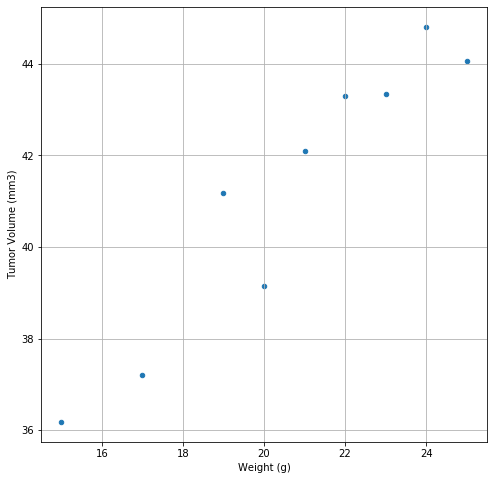

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_scatter = uni_mouse_df[uni_mouse_df["Drug Regimen"].isin(["Capomulin"])]

cap_scatter_df = top_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

cap_scatter_plot = cap_scatter.reset_index()

cap_sorted = cap_scatter_plot.sort_values(["Weight (g)"], ascending=True)

cap_grouped_weight = cap_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_grouped_plot = pd.DataFrame(cap_grouped_weight).reset_index()

capomulin_scatter = cap_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

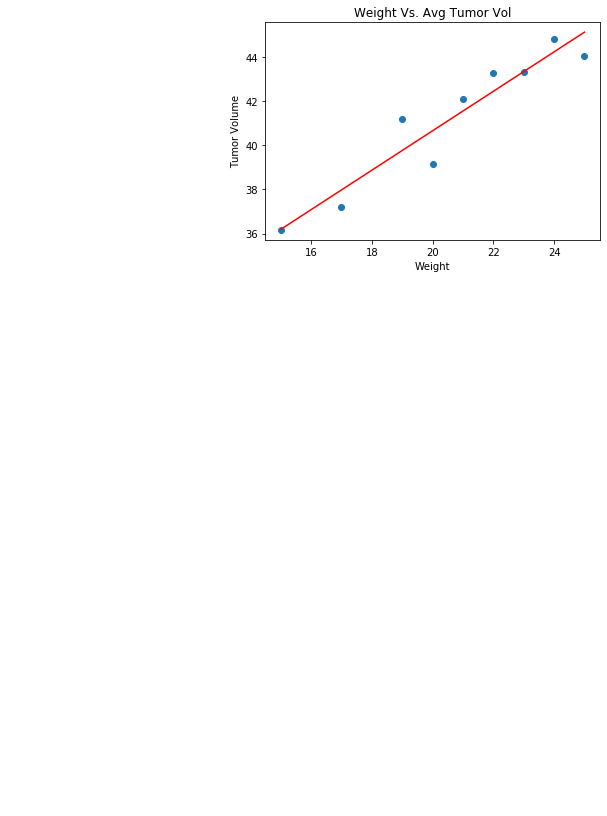

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_grouped_plot["Weight (g)"]
y_values = cap_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()